# Loading modules and libraries


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

from scipy import stats

import warnings
warnings.filterwarnings("ignore")


from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix as cm


from pylab import rcParams

import tpot
import joblib
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV

rcParams['figure.figsize'] = 8, 6
sb.set_style('whitegrid')

df_ori = pd.read_csv('diabetes.csv')

df_ori.head()

df_ori.info()

df_ori.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [2]:
df_ori.info()
df_ori.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data vizualization and cleaning 

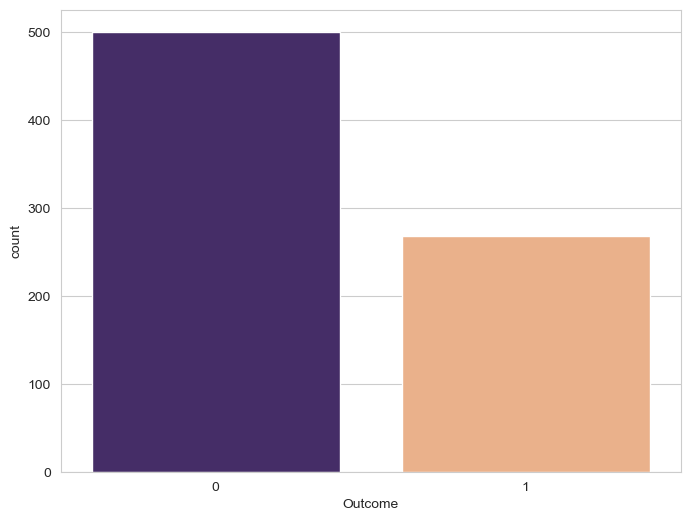

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [3]:
df_ori["Outcome"].value_counts()             #let's see the number of classes of people with diabetes and without diabetes
sb.countplot(x="Outcome", data=df_ori, palette=['#432371',"#FAAE7B"])      #let's visualize it with countplot
plt.savefig("outcome_count.png")
plt.show()

#Let's show it as a percentage of the cases of being and not having diabetes.
#While 65% do not have diabetes, the remaining 35% of observations show that they suffer from diabetes.

100 * df_ori["Outcome"].value_counts() / len(df_ori)

In [4]:
df_ori['Glucose'] = df_ori['Glucose'].replace(0,df_ori['BMI'].mean())
df_ori['BloodPressure'] = df_ori['BloodPressure'].replace(0,df_ori['BMI'].mean())
df_ori['SkinThickness'] = df_ori['SkinThickness'].replace(0,df_ori['BMI'].mean())
df_ori['Insulin'] = df_ori['Insulin'].replace(0,df_ori['BMI'].mean())
df_ori['BMI'] = df_ori['BMI'].replace(0,df_ori['BMI'].mean())
df_ori['DiabetesPedigreeFunction'] = df_ori['DiabetesPedigreeFunction'].replace(0,df_ori['DiabetesPedigreeFunction'].mean())
df_ori.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.102816      70.563464      29.992598   95.379198   
std       3.369578   31.280192      14.746220       8.886011  105.106957   
min       0.000000   31.992578      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      25.000000   31.992578   
50%       3.000000  117.000000      72.000000      31.992578   31.996289   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450805                  0.471876   33.240885    0.348958  
std      6.875374                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

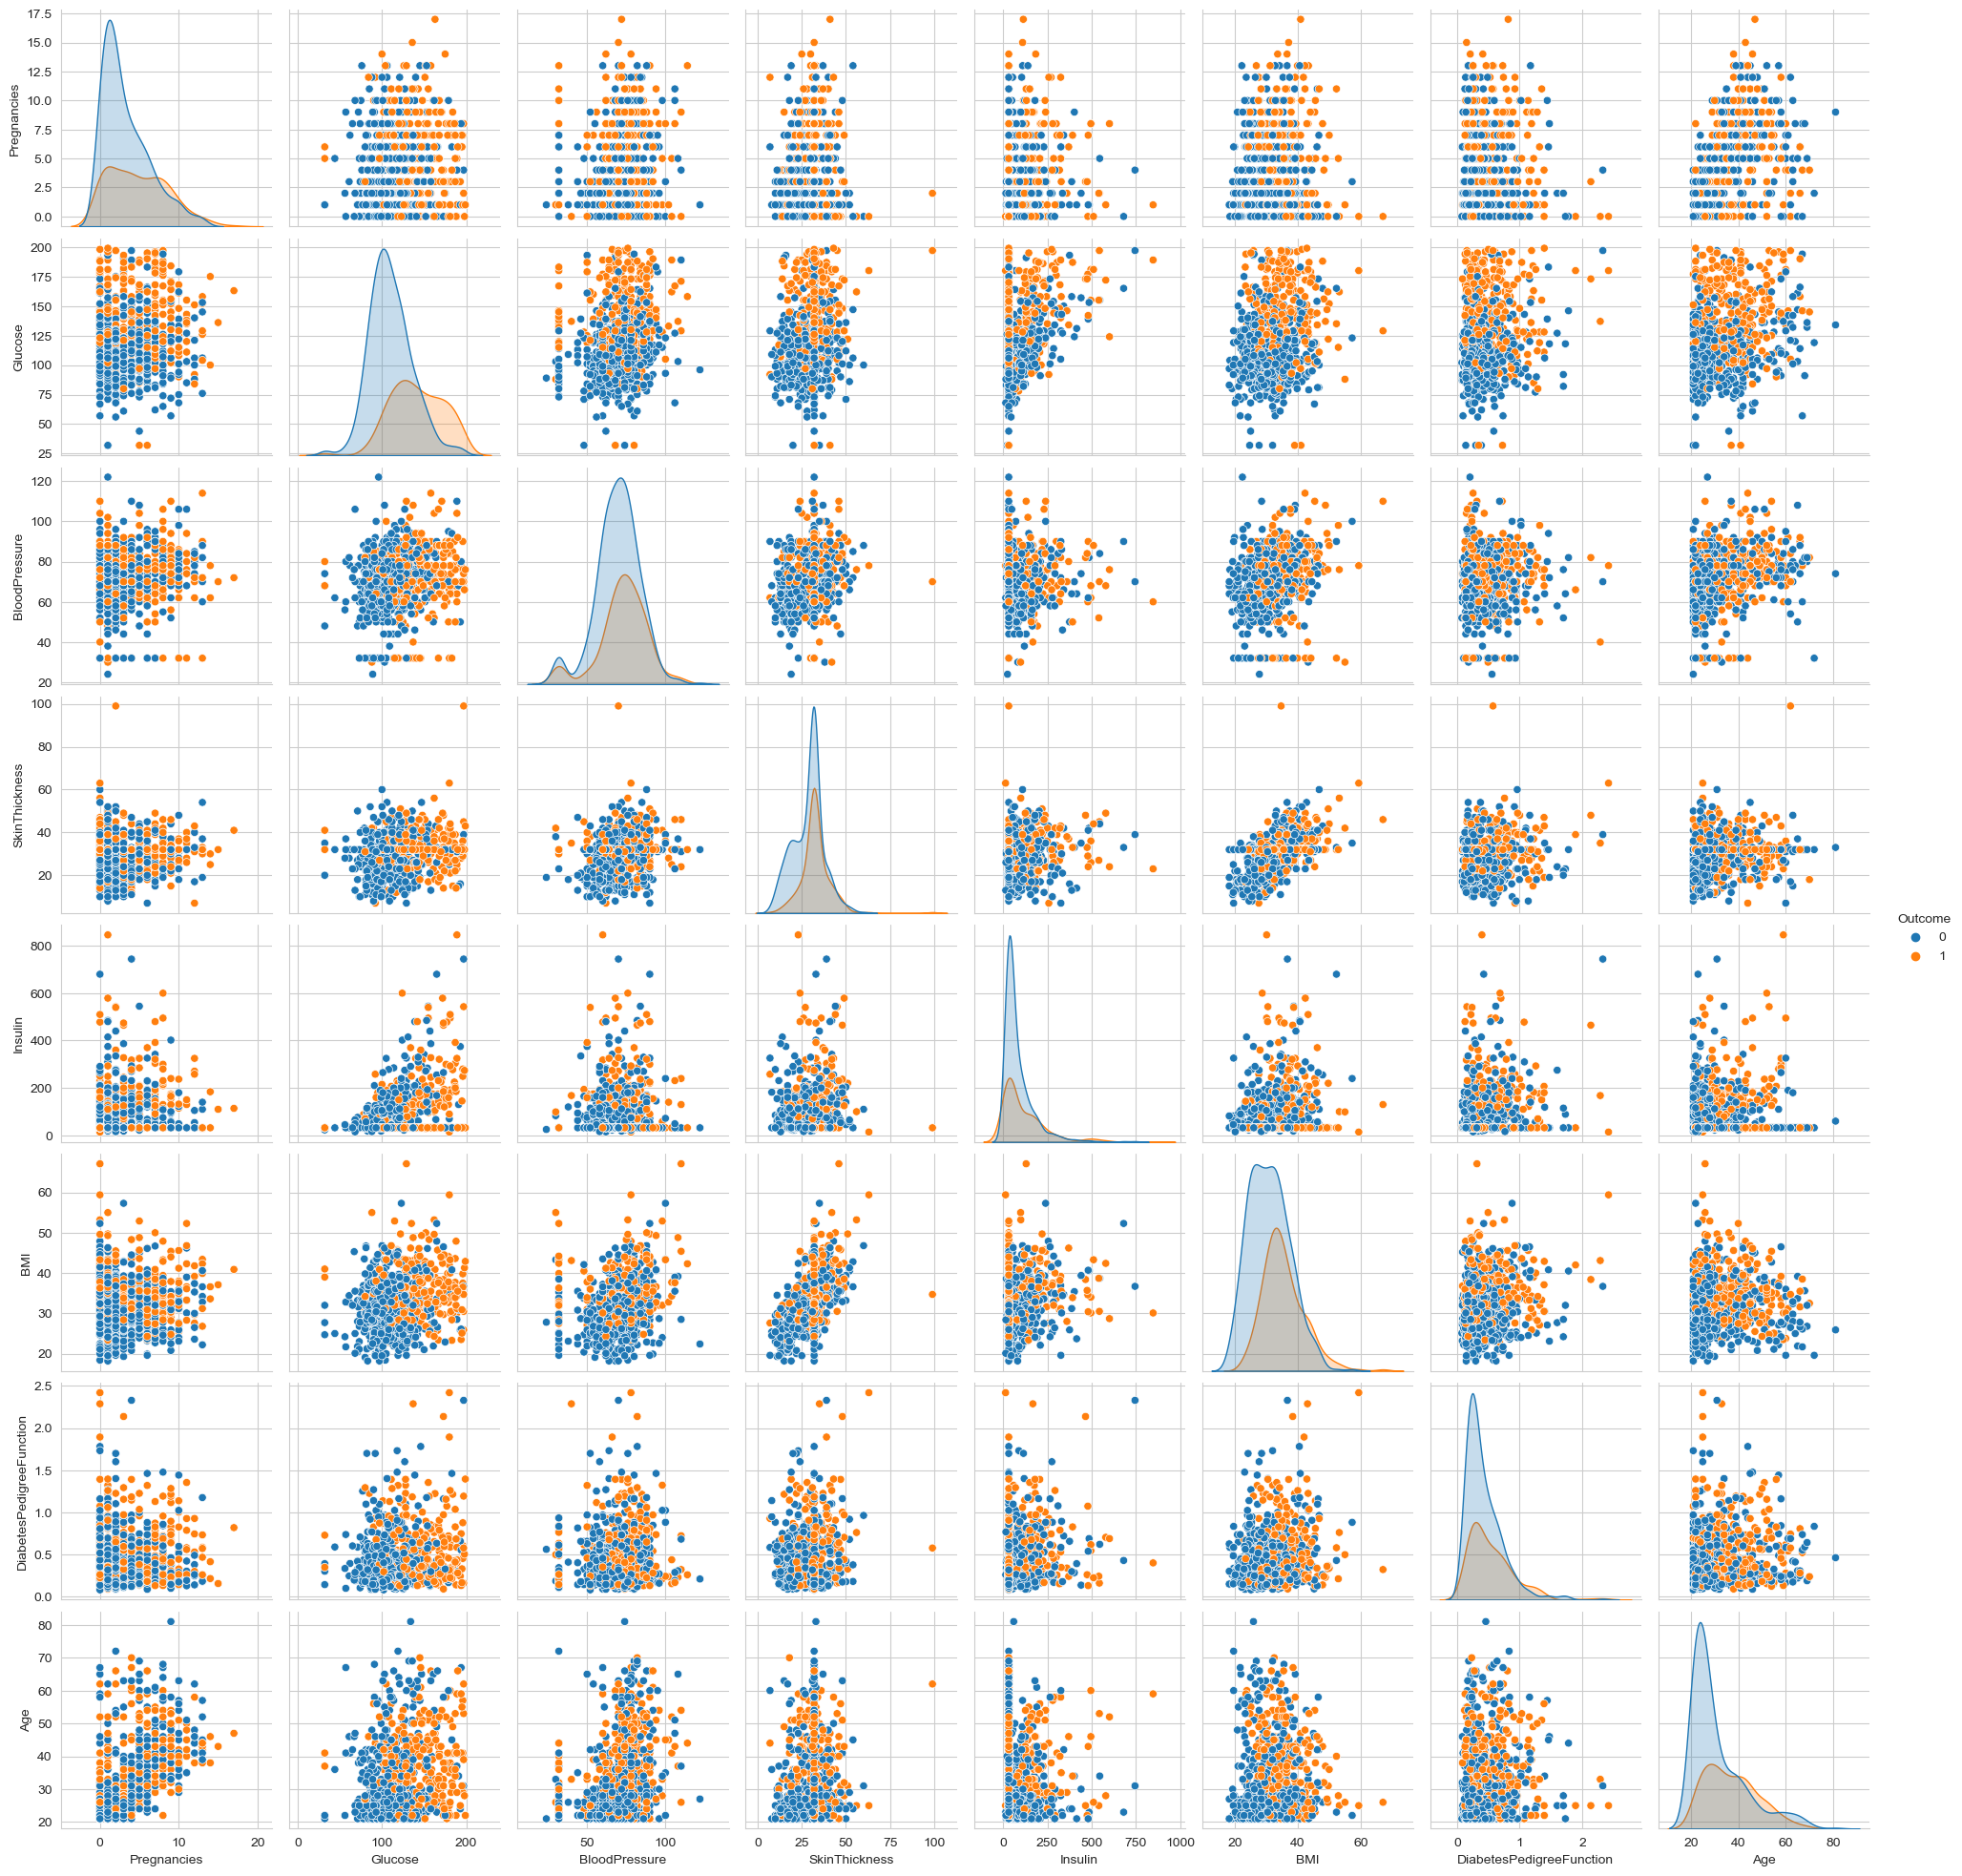

In [5]:
# Pairplot 
sb.pairplot(data = df_ori, hue = 'Outcome')
plt.savefig("pairbeforecleaning.png")
plt.show()


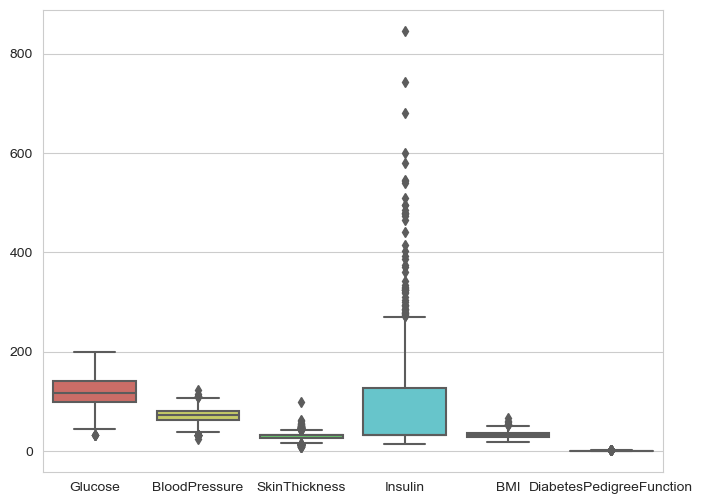

In [6]:
sb.boxplot(data=df_ori[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']], palette='hls')
plt.savefig("boxplotoriginal.png")

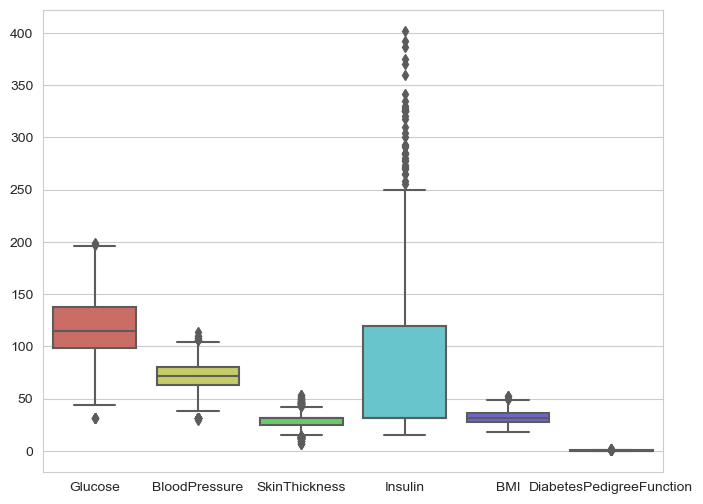

In [7]:
z_scores = stats.zscore(df_ori)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df_ori[filtered_entries]
sb.boxplot(data=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' , 'DiabetesPedigreeFunction']], palette='hls')
plt.savefig("boxplotorignal_rm_zscoreLS3.png")

31.992578124999977
192.80000000000007
0.93803816442777


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   723.000000  723.000000     723.000000     723.000000  723.000000   
mean      3.857538  119.622355      70.493427      29.650556   77.020340   
std       3.294906   30.657260      14.479528       8.286268   59.180623   
min       0.000000   31.992578      30.000000       7.000000   15.000000   
25%       1.000000   99.000000      63.000000      25.000000   31.992578   
50%       3.000000  115.000000      72.000000      31.992578   31.992578   
75%       6.000000  138.000000      80.000000      32.000000  120.000000   
max      13.000000  199.000000     114.000000      54.000000  192.800000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  723.000000                723.000000  723.000000  723.000000  
mean    32.176256                  0.449281   32.972337    0.337483  
std      6.501435                  0.282582   11.313919    0.473178  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.450000                  0.242000   24.000000    0.000000  
50%     32.000000                  0.362000   29.000000    0.000000  
75%     36.150000                  0.600500   40.000000    1.000000  
max     52.900000                  1.461000   68.000000    1.000000

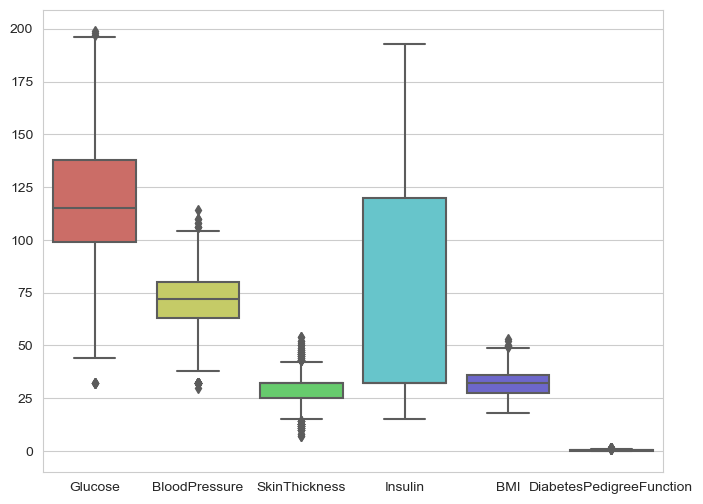

In [8]:
print(df['Insulin'].quantile(0.10))
print(df['Insulin'].quantile(0.90))
df["Insulin"] = np.where(df["Insulin"] > 192.80, 192.80,df['Insulin'])
print(df['Insulin'].skew())
sb.boxplot(data=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']], palette='hls')
plt.savefig("boxaftercleaning.png")
df.describe()

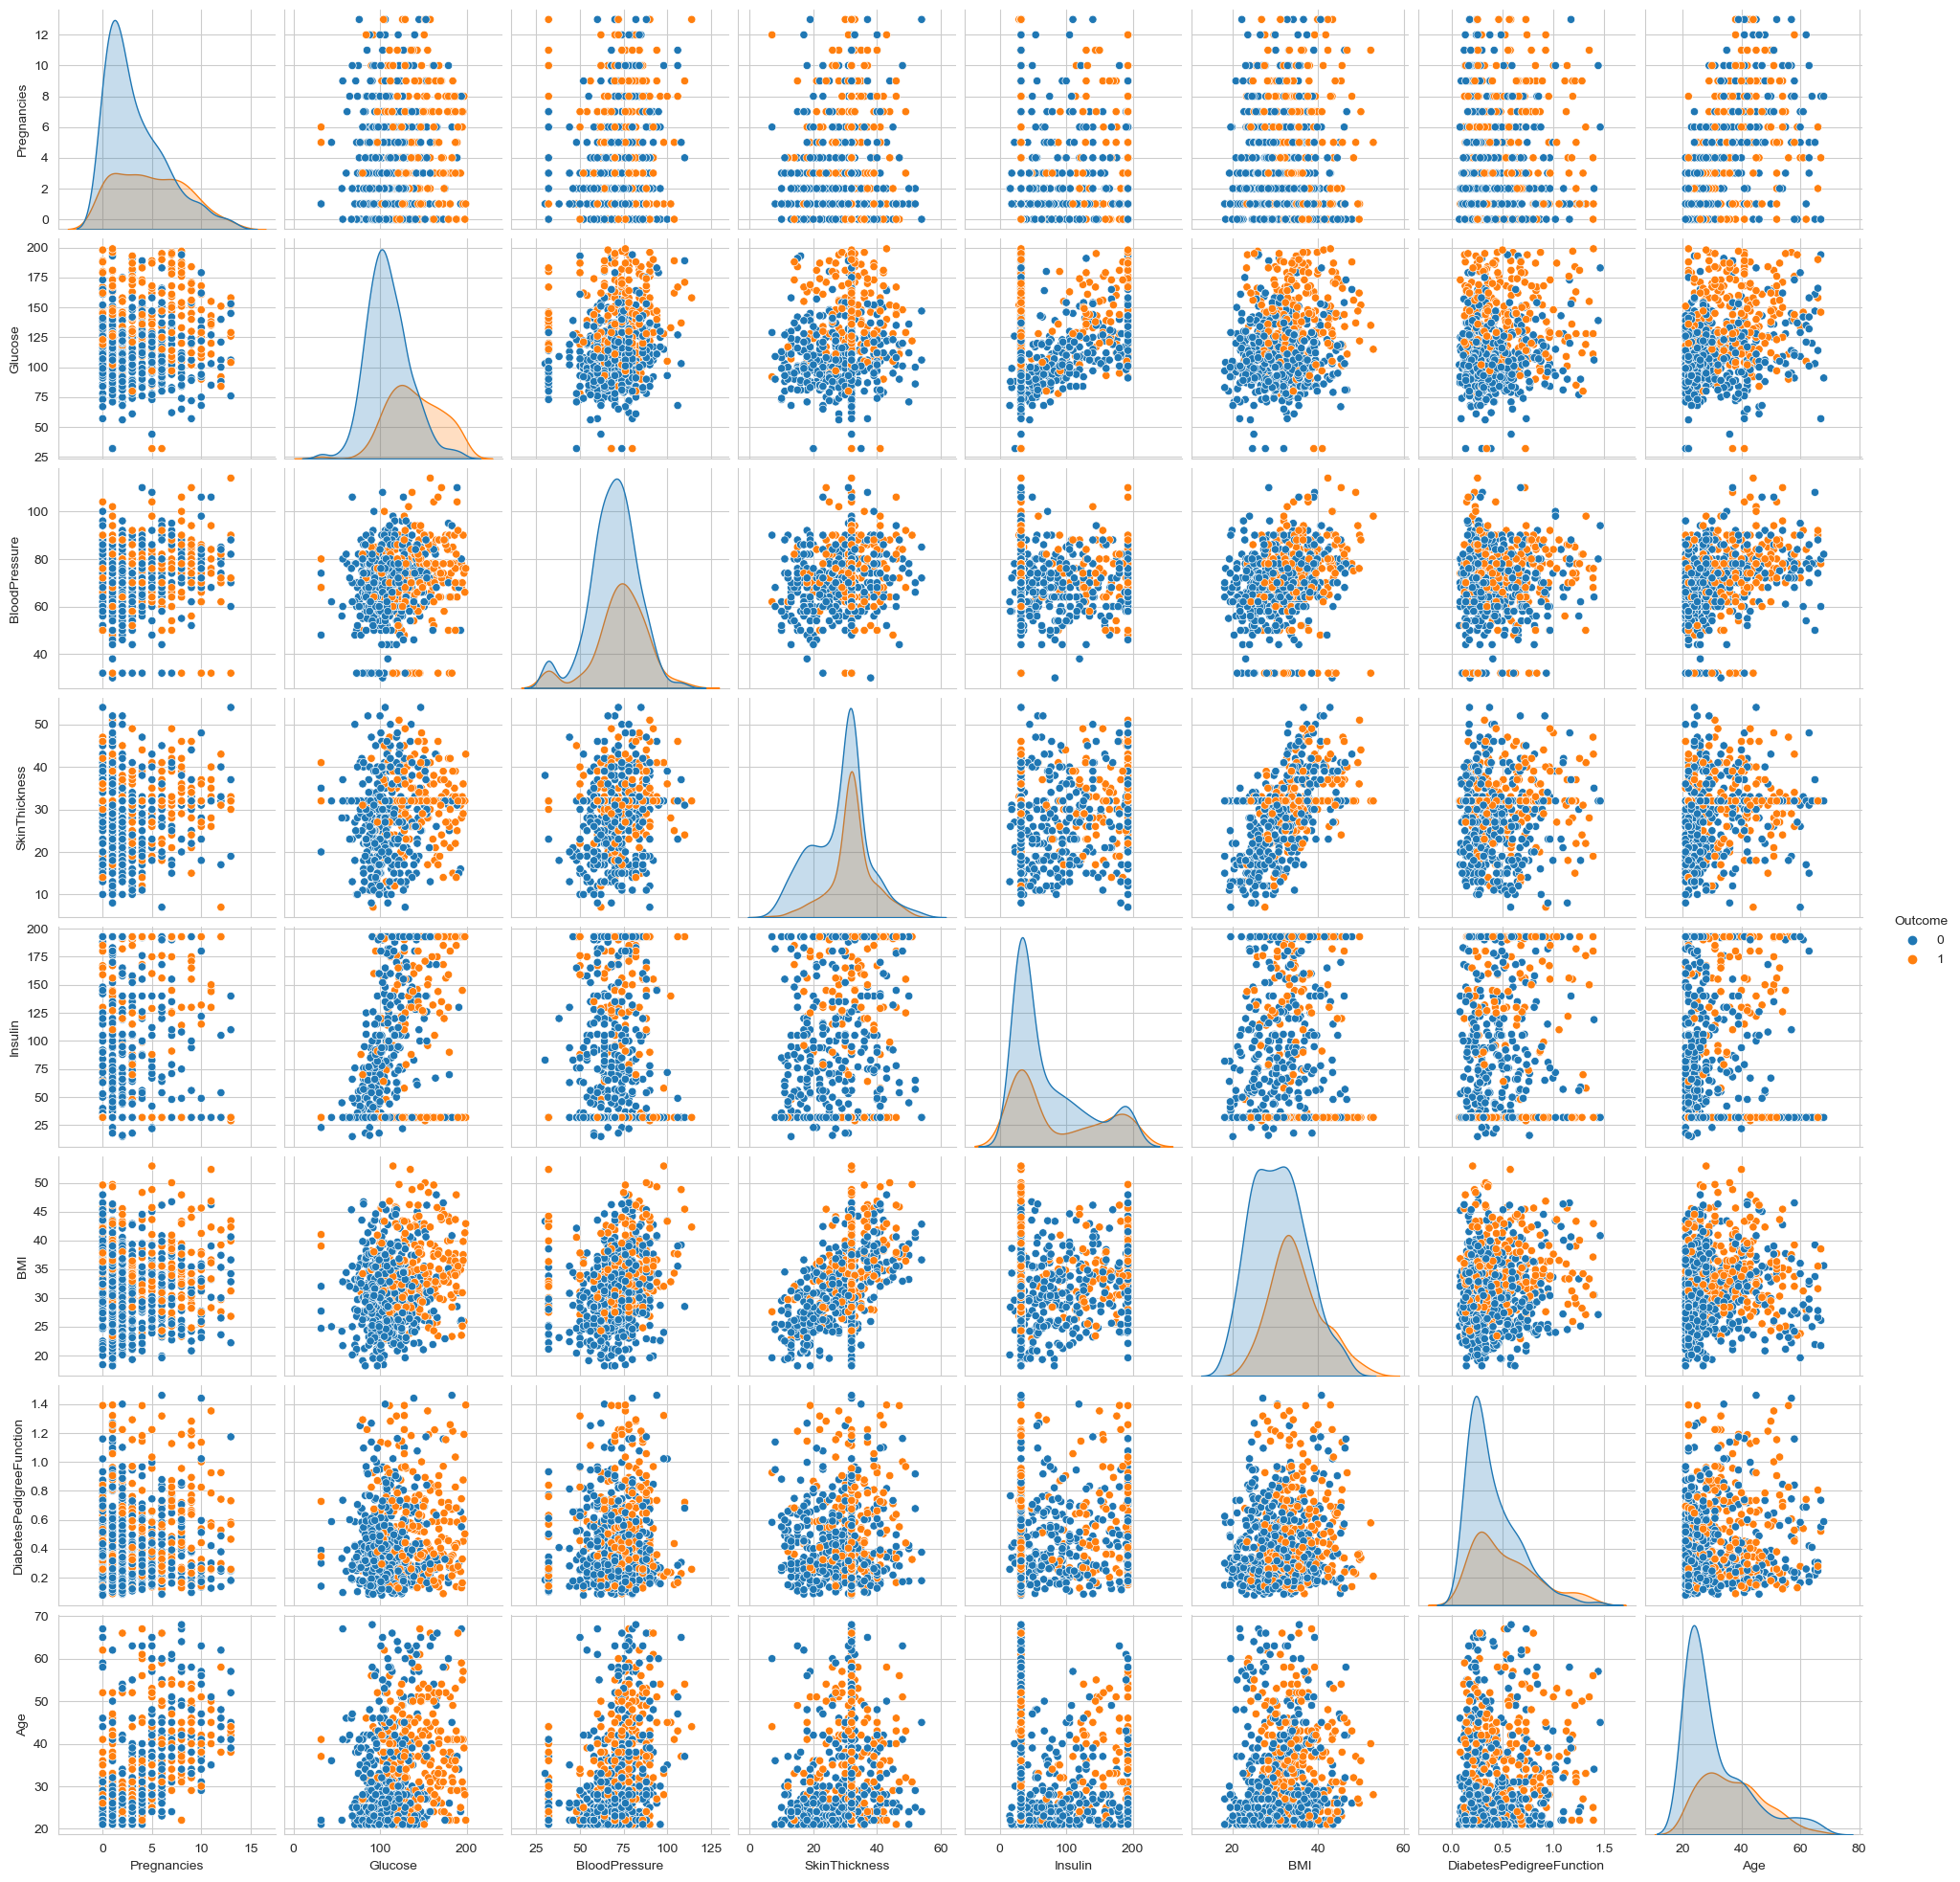

In [9]:
# Pairplot 
sb.pairplot(data = df, hue = 'Outcome')
plt.savefig("pair_aftercleaning.png")
plt.show()


In [10]:
#  Outliers

#Let's check the outliers
#In this problem, according to the number of observations respectively
# the first quarter and third quarter values were taken as 0.05 and 0.95.

#The function describes up and low tresholds.
def outlier_thresholds(dataframe, col_name, q1=0.1, q3=0.9): 
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
#The function check dataframe's outliers in the columns.
#According to this function,
# there are outliers only in the insulin variable
def check_outlier(dataframe, col_name):                           
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in df.columns:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [11]:
#The function replace the outliers with up and low value.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

#Now that we a function replace_with_tresholds, let's use it.
#replace_with_thresholds(df, "Insulin")
#replace_with_thresholds(df, "SkinThickness")

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


<AxesSubplot:>

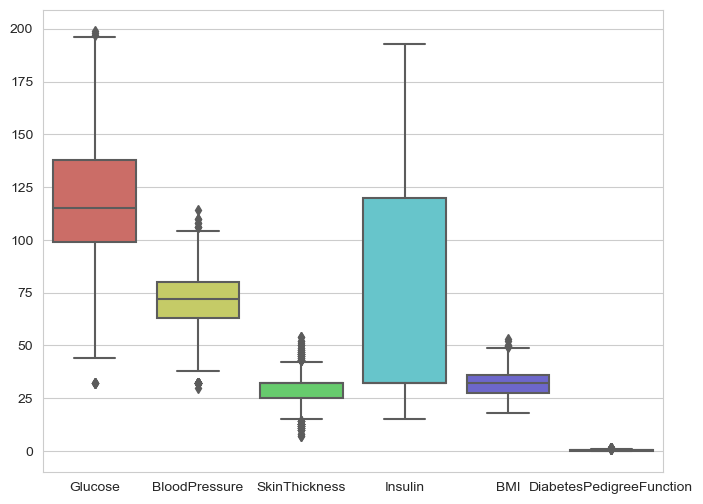

In [12]:
for col in df.columns:
    print(col, check_outlier(df, col))

sb.boxplot(data=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']], palette='hls')

In [13]:
df_un = df
df.head()
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   723.000000  723.000000     723.000000     723.000000  723.000000   
mean      3.857538  119.622355      70.493427      29.650556   77.020340   
std       3.294906   30.657260      14.479528       8.286268   59.180623   
min       0.000000   31.992578      30.000000       7.000000   15.000000   
25%       1.000000   99.000000      63.000000      25.000000   31.992578   
50%       3.000000  115.000000      72.000000      31.992578   31.992578   
75%       6.000000  138.000000      80.000000      32.000000  120.000000   
max      13.000000  199.000000     114.000000      54.000000  192.800000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  723.000000                723.000000  723.000000  723.000000  
mean    32.176256                  0.449281   32.972337    0.337483  
std      6.501435                  0.282582   11.313919    0.473178  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.450000                  0.242000   24.000000    0.000000  
50%     32.000000                  0.362000   29.000000    0.000000  
75%     36.150000                  0.600500   40.000000    1.000000  
max     52.900000                  1.461000   68.000000    1.000000

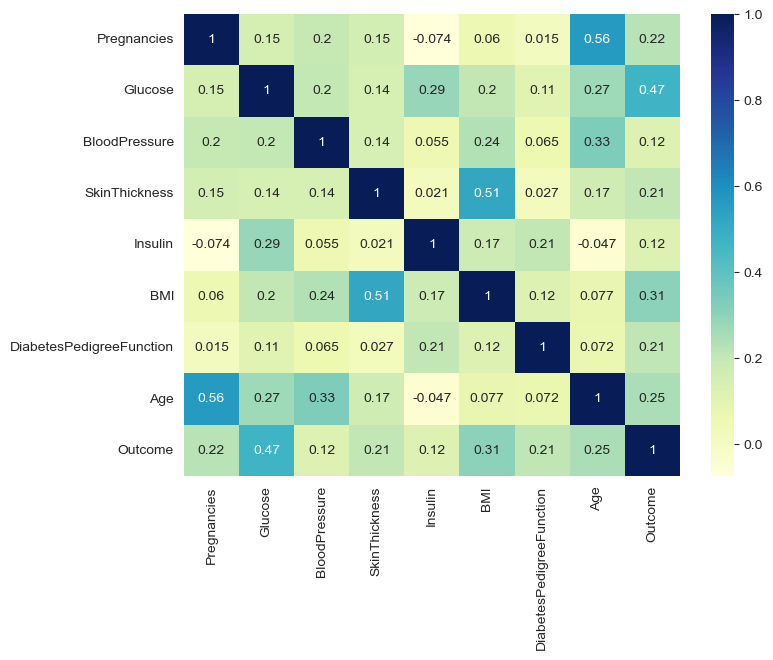

In [14]:
fig = sb.heatmap(data = df.corr(),annot = True, cmap = "YlGnBu")
plt.savefig("heatmap.png")

# Model Building 


In [15]:
#since this problem addresses a classification problem,
# it has been considered to use a logistic regression model.
# And in this model, while the outcome is the dependent variable,
# all other variables constitute the independent variables.

y = df_un["Outcome"]
X = df_un.drop(["Outcome"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (578, 8)
x_test:  (145, 8)
y_train:  (578,)
y_test:  (145,)


In [16]:

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,2,5,10,20,25],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,2,5,10,20,25]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,2,5,10,20,25]
            #'max_iter' : [1, 10, 50, 100, 150]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
result_models = pd.DataFrame(scores,columns=['model','best_score','best_params'])
result_models

In [ ]:
lr    = LogisticRegression(random_state=40)
lr.fit(x_train, y_train)

train_accuracy = lr.score(x_train, y_train)
test_accuracy = lr.score(x_test, y_test)
print('Logistic Regression', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')

# Applying AutoML

In [19]:

AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )
AutoML.fit(x_train,y_train)

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7664167916041978

Generation 2 - Current best internal CV score: 0.7681109445277361

Generation 3 - Current best internal CV score: 0.7750374812593703

Generation 4 - Current best internal CV score: 0.7750374812593703

Generation 5 - Current best internal CV score: 0.7750374812593703

Best pipeline: LinearSVC(MinMaxScaler(input_matrix), C=0.1, dual=False, loss=squared_hinge, penalty=l1, tol=0.001)


TPOTClassifier(generations=5, verbosity=2)

In [ ]:
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )


AutoML.fit(X,y)
#save model 
with open('model-v1.joblib', 'wb') as f:
    joblib.dump(lr,f)

In [ ]:
predictions = AutoML.predict(x_test)
score = round(accuracy_score(y_test, predictions), 3)
print('AutoML', '-'*35, 
      'Accuracy Score of Train Model : {:.2f}'.format(train_accuracy), 
      'Accuracy Score of Test  Model : {:.2f}'.format(test_accuracy), sep='\n')
cm1 = cm(y_test, predictions)


sb.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.savefig("confusionmatrix.png")
plt.show()

In [22]:
AutoML.export('pipeline.py')

# Feature engineering

In [23]:
# Features Creating

# is pregnancy
# Let's creat new variable calls "Pregnancy_history".
# Yes means being pregnacy otherwise no
df.loc[((df['Pregnancies']) > 0), "Pregnancy_history"] = "yes"
df.loc[((df['Pregnancies']) == 0), "Pregnancy_history"] = "no"

# risk level according to having diabete or not as ages
#Adapting the WHO (World Health Organization) datas
df.loc[(df['Age'] > 20) & (df['Age'] < 34),'age_vs_diabete'] = 'low_risky'
df.loc[(df['Age'] >= 35) & (df['Age'] < 44), 'age_vs_diabete'] = 'risky'
df.loc[(df['Age'] >= 45) & (df['Age'] < 54),'age_vs_diabete'] = 'too_risky'
df.loc[(df['Age'] >= 55),'age_vs_diabete'] = 'high_risky'

# glucose and levels
# These levels are determined according to the accepted glucose values.
df.loc[(df['Glucose'] > 0) & (df['Glucose'] < 70), 'Glucose_level'] = 'hypoglosemia'
df.loc[(df['Glucose'] >= 71) & (df['Glucose'] < 100), 'Glucose_level'] = 'normall'
df.loc[(df['Glucose'] >= 101) & (df['Glucose'] < 125), 'Glucose_level'] = 'hidden_diabete'
df.loc[(df['Glucose'] >= 126), 'Glucose_level'] = 'diabete'

# age level
df.loc[(df['Age'] < 18), 'Age_group'] = 'young'
df.loc[(df['Age'] >= 19) & (df['Age'] < 55), 'Age_group'] = 'mature'
df.loc[(df['Age'] >= 56), 'Age_group'] = 'older'

#BMI level
#These levels are determined according to the
# accepted Body mass indicator (BMI) values.
df.loc[(df['BMI'] < 18),'Weight_Criteria'] = 'unhealthy'
df.loc[(df['BMI'] >= 19) & (df['BMI'] < 25), 'Weight_Criteria'] = 'normal'
df.loc[(df['BMI'] >= 26) & (df['BMI'] < 30),'Weight_Criteria'] = 'overweight'
df.loc[(df['BMI'] >= 31),'Weight_Criteria'] = 'obese'

#Insulin level
#In this problem 2 hours after glucose administration
#16-166 mIU/L is normal level of Insulin.
df.loc[(df['Insulin'] >= 16) & (df['Insulin'] <= 166) , 'Insulin_level'] = 'normal'
df.loc[(df['Insulin'] < 16), 'Insulin_level'] = 'not_normal'
df.loc[(df['Insulin'] > 166) ,'Insulin_level'] = 'not_normal'
df.loc[(df['Insulin'] == 0.0 ), 'Insulin_level'] = 'not_normal'

df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin        BMI  \
0             6    148.0      72.000000      35.000000  31.992578  33.600000   
1             1     85.0      66.000000      29.000000  31.992578  26.600000   
2             8    183.0      64.000000      31.992578  31.992578  23.300000   
3             1     89.0      66.000000      23.000000  94.000000  28.100000   
5             5    116.0      74.000000      31.992578  31.992578  25.600000   
6             3     78.0      50.000000      32.000000  88.000000  31.000000   
7            10    115.0      31.992578      31.992578  31.992578  35.300000   
9             8    125.0      96.000000      31.992578  31.992578  31.992578   
10            4    110.0      92.000000      31.992578  31.992578  37.600000   
11           10    168.0      74.000000      31.992578  31.992578  38.000000   

    DiabetesPedigreeFunction  Age  Outcome Pregnancy_history age_vs_diabete  \
0                      0.627   50        1               yes      too_risky   
1                      0.351   31        0               yes      low_risky   
2                      0.672   32        1               yes      low_risky   
3                      0.167   21        0               yes      low_risky   
5                      0.201   30        0               yes      low_risky   
6                      0.248   26        1               yes      low_risky   
7                      0.134   29        0               yes      low_risky   
9                      0.232   54        1               yes            NaN   
10                     0.191   30        0               yes      low_risky   
11                     0.537   34        1               yes            NaN   

     Glucose_level Age_group Weight_Criteria Insulin_level  
0          diabete    mature           obese        normal  
1          normall    mature      overweight        normal  
2          diabete    mature         normall        normal  
3          normall    mature      overweight        normal  
5   hidden_diabete    mature             NaN        normal  
6          normall    mature           obese        normal  
7   hidden_diabete    mature           obese        normal  
9              NaN    mature           obese        normal  
10  hidden_diabete    mature           obese        normal  
11         diabete    mature           obese        normal

In [24]:
#After creating new categorical variables,
#let's convert these categorical variables
#into a numeric variable using the one hot encoding method.

def grab_col_names(dataframe, cat_th=10, car_th=20):
     # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 723
Variables: 15
cat_cols: 7
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [25]:
#One-Hot Encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

#ohe_cols will convert into a numerical columns
ohe_cols = ['Pregnancy_history',
 'age_vs_diabete',
 'Glucose_level',
 'Age_group',
 'Weight_Criteria',
 'Insulin_level']

df = one_hot_encoder(df, ohe_cols)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0            6    148.0           72.0      35.000000  31.992578  33.6   
1            1     85.0           66.0      29.000000  31.992578  26.6   
2            8    183.0           64.0      31.992578  31.992578  23.3   
3            1     89.0           66.0      23.000000  94.000000  28.1   
5            5    116.0           74.0      31.992578  31.992578  25.6   

   DiabetesPedigreeFunction  Age  Outcome  Pregnancy_history_no  ...  \
0                     0.627   50        1                     0  ...   
1                     0.351   31        0                     0  ...   
2                     0.672   32        1                     0  ...   
3                     0.167   21        0                     0  ...   
5                     0.201   30        0                     0  ...   

   Glucose_level_hidden_diabete  Glucose_level_hypoglosemia  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
5                             1                           0   

   Glucose_level_normall  Age_group_mature  Age_group_older  \
0                      0                 1                0   
1                      1                 1                0   
2                      0                 1                0   
3                      1                 1                0   
5                      0                 1                0   

   Weight_Criteria_normall  Weight_Criteria_obese  Weight_Criteria_overweight  \
0                        0                      1                           0   
1                        0                      0                           1   
2                        1                      0                           0   
3                        0                      0                           1   
5                        0                      0                           0   

   Insulin_level_normal  Insulin_level_not_normal  
0                     1                         0  
1                     1                         0  
2                     1                         0  
3                     1                         0  
5                     1                         0  

[5 rows x 26 columns]

In [26]:
#Let's scale our numerical colums to get most appreciate results.
#Standard Scaler

def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()
df.head()


Observations: 723
Variables: 26
cat_cols: 18
num_cols: 8
cat_but_car: 0
num_but_cat: 18


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.650685  0.926283       0.104121       0.646026 -0.761380  0.219141   
1    -0.867860 -1.130118      -0.310544      -0.078565 -0.761380 -0.858290   
2     1.258102  2.068728      -0.448766       0.282835 -0.761380 -1.366222   
3    -0.867860 -0.999553      -0.310544      -0.803155  0.287111 -0.627412   
5     0.346976 -0.118238       0.242342       0.282835 -0.761380 -1.012209   

   DiabetesPedigreeFunction       Age  Outcome  Pregnancy_history_no  ...  \
0                  0.629348  1.506061        1                     0  ...   
1                 -0.348036 -0.174449        0                     0  ...   
2                  0.788704 -0.086001        1                     0  ...   
3                 -0.999626 -1.058928        0                     0  ...   
5                 -0.879224 -0.262897        0                     0  ...   

   Glucose_level_hidden_diabete  Glucose_level_hypoglosemia  \
0                             0                           0   
1                             0                           0   
2                             0                           0   
3                             0                           0   
5                             1                           0   

   Glucose_level_normall  Age_group_mature  Age_group_older  \
0                      0                 1                0   
1                      1                 1                0   
2                      0                 1                0   
3                      1                 1                0   
5                      0                 1                0   

   Weight_Criteria_normall  Weight_Criteria_obese  Weight_Criteria_overweight  \
0                        0                      1                           0   
1                        0                      0                           1   
2                        1                      0                           0   
3                        0                      0                           1   
5                        0                      0                           0   

   Insulin_level_normal  Insulin_level_not_normal  
0                     1                         0  
1                     1                         0  
2                     1                         0  
3                     1                         0  
5                     1                         0  

[5 rows x 26 columns]